# Coronavirus outbreak 2020

- Taken world-wide data from

- Source: https://www.worldometers.info/coronavirus/

- Fit growth model of type $t^p$ for infections and deaths

- Predict infection and deaths for the next day based on that model

- starting 21 January 


In [1]:
%%file data.txt
date,infected,deaths
21/jan/2020,446,9
22/jan/2020,579,17
23/jan/2020,844,25
24/jan/2020,1312,41
25/jan/2020,2015,56
26/jan/2020,2801,80
27/jan/2020,4579,106
28/jan/2020,6061,132
29/jan/2020,7816,170
30/jan/2020,9821,213
31/jan/2020,11948,258

Writing data.txt


In [2]:
%config InlineBackend.figure_formats = ['svg']
import pandas as pd
import scipy.optimize
import numpy as np
import seaborn
import datetime
seaborn.set()
%matplotlib inline

In [3]:
print("Last executed: ", datetime.date.today().isoformat())

Last executed:  2020-02-01


In [4]:
data = pd.read_csv('data.txt', 
                   parse_dates=[0], 
                   infer_datetime_format=True)

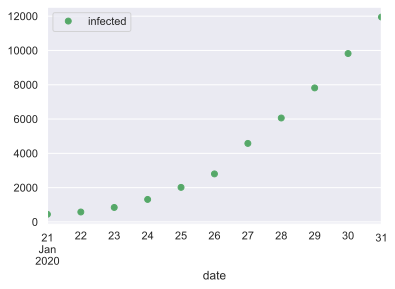

In [5]:
data.plot('date', 'infected', style='og');

Compute some more useful columns

In [6]:
data['days-td'] = data['date'] - data['date'][0]  # td = TimeDelta
data['days'] = data['days-td'].astype("timedelta64[D]").astype(float)
data['new-infection'] = data['infected'].diff()

data

,date,infected,deaths,days-td,days,new-infection
0,2020-01-21,446,9,0 days,0.0,NaN
1,2020-01-22,579,17,1 days,1.0,133.0
2,2020-01-23,844,25,2 days,2.0,265.0
3,2020-01-24,1312,41,3 days,3.0,468.0
4,2020-01-25,2015,56,4 days,4.0,703.0
5,2020-01-26,2801,80,5 days,5.0,786.0
6,2020-01-27,4579,106,6 days,6.0,1778.0
7,2020-01-28,6061,132,7 days,7.0,1482.0
8,2020-01-29,7816,170,8 days,8.0,1755.0
9,2020-01-30,9821,213,9 days,9.0,2005.0


Assume a model of type $c(t-t_0)^p + a_0$ to describe the growth:

In [7]:
def model(t, c, t0, p, a0):
    return c*(t-t0)**p + a0    

Use `curve_fit` from `scipy.optimize` to determine parameters

# Global infections

In [8]:
days = data['days']
infections = data['infected']

param_infections, cov = \
    scipy.optimize.curve_fit(model, days, 
                             infections, p0=(1, 0, 2, 0))

In [9]:
def pretty_params(param, end="\n"):
    c, t0, p, a0 = param
    s = "p = {:.3f}".format(p) + end
    s += "c = {:.3g}".format(c) + end
    s += "t0= {:.3f}".format(t0) + end
    s += "a0= {:.3f}".format(a0)
    return s

Fit model, and plot.

In [10]:
c, t0, p, a0 = param_infections
fitted_infections = model(days, c, t0, p, a0)
print(pretty_params(param_infections))

p = 2.108
c = 90.9
t0= -0.000
a0= 422.577


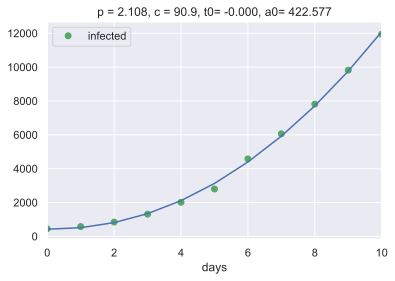

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data.plot('days', 'infected', style='og',ax=ax)
ax.plot(days, fitted_infections, '-b')
ax.set_title(pretty_params(param_infections, end=', '));

# Prediction of infection numbers for tomorrow

Assuming infections keep carry on growing as they have done according to the model:

In [12]:
print("Infected people tomorrow:", int(model(max(days)+1, c, t0, p, a0)))

Infected people tomorrow: 14687


More speculative predictions further into the future:

In [13]:
for future_days in range(1, 11):
    print(f"Infections in {future_days:2} days: ", 
          int(round(model(max(days)+future_days, c, t0, p, a0))))

Infections in  1 days:  14687
Infections in  2 days:  17560
Infections in  3 days:  20710
Infections in  4 days:  24141
Infections in  5 days:  27855
Infections in  6 days:  31854
Infections in  7 days:  36140
Infections in  8 days:  40715
Infections in  9 days:  45580
Infections in 10 days:  50738


# Deaths

Fit (the same) model, and plot.

In [14]:
days = data['days']
deaths = data['deaths']
param_death, cov = scipy.optimize.curve_fit(model, days, deaths, 
                                          p0=(1, 0, 2, 0))
print(pretty_params(param_death))

p = 2.768
c = 0.163
t0= -4.343
a0= -0.514


In [15]:
fitted_days = days
c, t0, p, a0 = param_death
fitted_deaths = model(fitted_days, c, t0, p, a0)

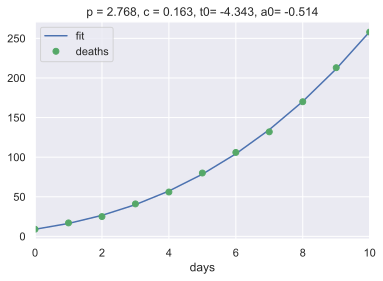

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(fitted_days, fitted_deaths, 'b-', label="fit")
ax.set_title(pretty_params(param_death, end=', '))
real_data = data.plot('days', 'deaths', style='og',ax=ax)
ax.legend();

## Prediction for tomorrow

Assuming increase of deaths carries on as before

In [17]:
print(f"Deaths in 1 day: ", 
          int(round(model(max(days)+1, c, t0, p, a0))))

Deaths in 1 day:  312


and more speculative beyond tomorrow

In [18]:
for future_days in range(1, 11):
    print(f"Deaths in {future_days:2} days: ", 
          int(round(model(max(days)+future_days, c, t0, p, a0))))

Deaths in  1 days:  312
Deaths in  2 days:  371
Deaths in  3 days:  438
Deaths in  4 days:  511
Deaths in  5 days:  592
Deaths in  6 days:  681
Deaths in  7 days:  778
Deaths in  8 days:  883
Deaths in  9 days:  997
Deaths in 10 days:  1120


In [19]:
print("Last executed: ", datetime.date.today().isoformat())

Last executed:  2020-02-01
